# Calorimeter Processing Notebook
1. Download processing scripts from Github

In [ ]:
# Init workspace
!git clone https://github.com/MEI-Research/calorimeter-python.git

Cloning into 'calorimeter-python'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 38 (delta 9), reused 30 (delta 6), pack-reused 0
Unpacking objects: 100% (38/38), done.


2. Upload CalRQ file (sample included on Github)

In [ ]:
# File Upload
# Sample file in sample-data folder from github repo
csv_file = files.upload()
csv_file, null = list(csv_file.items())[0]

Saving DynamicInfusion-1-Infusion-220506.csv to DynamicInfusion-1-Infusion-220506.csv


3. Process CalRQ Data

In [ ]:
from cal_process import cal_process
from google.colab import files

# Calorimeter data processing script
# This is the recommended way to analyze infusion data for the least amount
# of confusion. 
# This script is designed to calculate and simulate "Push" calorimeter eqns
# It calculates VO2 and VCO2 expected values based on the equivalent Pull
# calorimeter equations
# Outflow Rate = Inflow Rate + MFCs, Inflow Rate calc'd by Volume Haldane
# Outflow CO2 and O2 concentrations are calculated based on MFC values and
# a continous 'mixing tank' model for comparison to actual values.

# Input: Import CalRQ .csv data file 

# Output: Calculated VO2, VCO2 and supporting data

# Variables
volume = 30000
deriv_size = 8

[resultdf, resultfile] = cal_process(csv_file, volume, deriv_size = 8)



4. Plot results

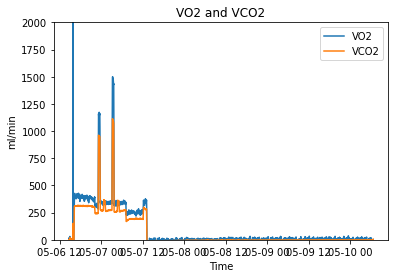

In [ ]:
import matplotlib.pyplot as plt
plt.plot(resultdf.Time, resultdf.VO2, label="VO2")
plt.plot(resultdf.Time, resultdf.VCO2, label="VCO2")
plt.plot()

ax = plt.gca()
# ax.set_xlim([0, 500])
ax.set_ylim([0, 2000])

plt.xlabel("Time")
plt.ylabel("ml/min")
plt.title("VO2 and VCO2")
plt.legend()
plt.show()